In [28]:
import numpy as np
import scipy.stats as stats

In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data_dir="C:/Users/tsb7592/Box/Participant app - timing test results"
os.chdir(data_dir)

# Compute the Total response time in minutes

In [47]:
# get all the Assesement Data

all_files = glob.glob('C:/Users/tsb7592/Box/Participant app - timing test results/*Assessment Data*.csv')
doc =[]
for file in all_files:
    if 'Narrow Structure' in file:
        continue
    else:
        data = pd.read_csv(file)
        print(file)
        if 'Remote' in file:
            data['Mode'] = 'Remote'
        else:
            data['Mode'] = 'In Person'
        doc.append(data)

df = pd.concat(doc)

C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-21 08.58.42 Assessment Data - Prod 4300 (Stacy).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 13.19.11 Assessment Data - Remote Apps 1.23.4782 (Stacy).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 17.08.53 Assessment Data (PROD - Odessa).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 17.50.39 Assessment Data (PROD- Andrey).csv
C:/Users/tsb7592/Box/Participant app - timing test results\2021-06-22 19.33.02 Assessment Data (Remote - Andrey).csv


In [48]:
#Set two decimal points for display
pd.options.display.float_format = "{:.2f}".format

In [109]:
#Drop the practice
df=df[df.Inst!='NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ Practice v2.1']

In [118]:
df.groupby(['PIN','Assessment Name','Inst'])['ResponseTime'].count()

PIN           Assessment Name  Inst                                                                  
@Prod         Prod 1           NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                               NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          62
              Prod 2           NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                               NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          61
              Prod 3           NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                               NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          59
              Prod 4           NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1    24
                               NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1          60
              Prod 5           NIH

In [50]:
df['App Version'].value_counts()

1.23.4300                  1377
1.23.4780 (Participant)     937
Name: App Version, dtype: int64

In [51]:
df['Mode'].value_counts()

In Person    1377
Remote        937
Name: Mode, dtype: int64

In [53]:
df.columns

Index(['PIN', 'DeviceID', 'Assessment Name', 'InstOrdr', 'InstSctn', 'ItmOrdr',
       'Inst', 'Locale', 'ItemID', 'Response', 'Score', 'Theta', 'TScore',
       'SE', 'DataType', 'Position', 'ResponseTime', 'DateCreated',
       'InstStarted', 'InstEnded', 'App Version', 'iPad Version',
       'Firmware Version', 'Mode'],
      dtype='object')

In [52]:
#Convert to datetime
df['InstStarted']= pd.to_datetime(df['InstStarted'])
df['InstEnded']= pd.to_datetime(df['InstEnded'])
df['DateCreated']= pd.to_datetime(df['DateCreated'])

In [110]:
df.Inst.unique()

array(['NIH Toolbox Flanker Inhibitory Control and Attention Test Age 12+ v2.1',
       'NIH Toolbox Pattern Comparison Processing Speed Test Age 7+ v2.1'],
      dtype=object)

In [32]:
df.ResponseTime.describe()

count   2089.00
mean       1.49
std        0.63
min        0.12
25%        1.33
50%        1.42
75%        1.65
max       19.36
Name: ResponseTime, dtype: float64

In [55]:
def select_inst(df, select):
    sdata = df.set_index('Inst').filter(like=select, axis=0)
    data= sdata[['PIN','ItemID','DateCreated','ResponseTime']]
    return data

In [94]:
def save_median_mean(df, var= 'ResponseTime'):
    '''
    Save the median and mean as a new column under Type for selected var
    '''
    mni = df.groupby('ItemID')[var].mean().reset_index()
    mni['Type'] = 'mean'
    mne = df.groupby('ItemID')[var].median().reset_index()
    mne['Type'] = 'median'
    rv = mni.append(mne, ignore_index=True)
    return rv

# Plots
where the y-axis is the ResponseTime and the x-axis is the items (practice1, practice2 .. etc). Put lines through them so there are 10 horizontal lines (and dots for each item).

In [101]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
def draw_median_mean(sdata, meas, var='ResponseTime'):
    sns.set() #change style

    g=sns.lineplot(data=sdata, x="ItemID", y=var,hue='PIN',  markers=True, dashes=False)
    g.set_title(meas+" (mean and median) by Item", fontsize=15)
    n=sdata['ItemID'].nunique()
    g.set_xticklabels(labels=range(n), rotation=30)
    g.legend (loc="upper right");
   

In [105]:
def draw_all(sdata, meas, var='ResponseTime'):
    sns.set() #change style
    # Create a visualization
    line,g = plt.subplots(figsize=(15,12))
    sns.lineplot(data=sdata, x="ItemID", y="ResponseTime",hue='PIN',  markers=True, dashes=False)
    g.set_title(meas+" ResponseTime vs ItemID by trial", fontsize=15)
    n=sdata['ItemID'].nunique()
    g.set_xticklabels(labels=range(n), rotation=30)
    g.legend (loc="upper right");


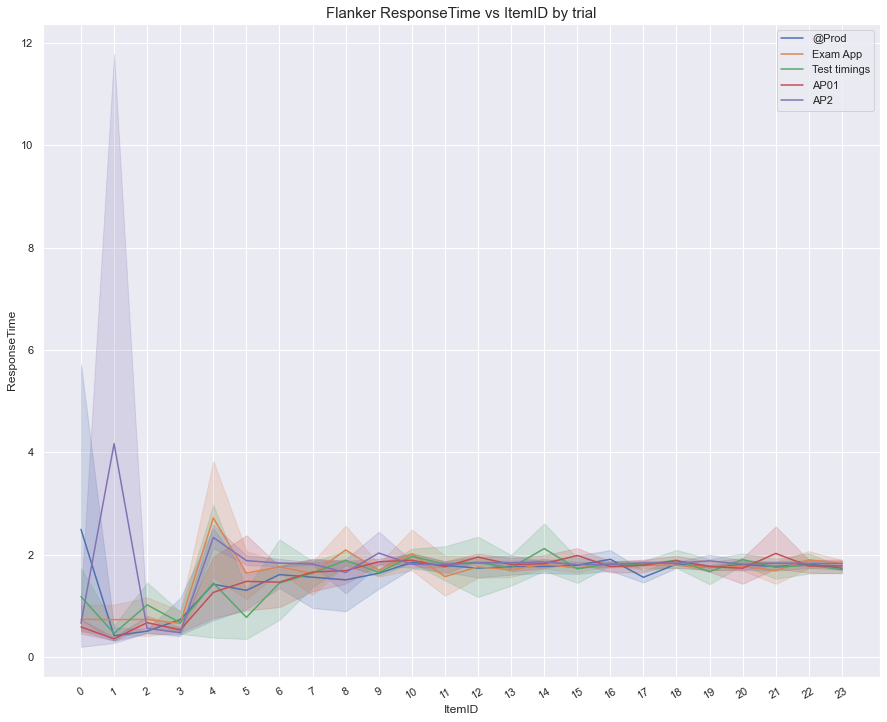

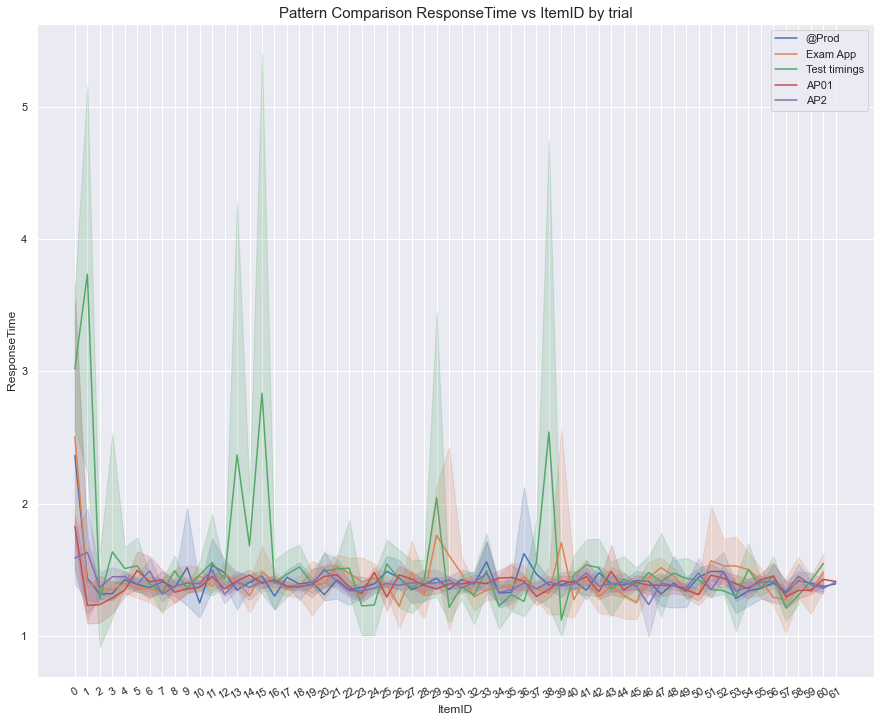

In [111]:
insts=['Flanker', 'Pattern Comparison']
bdf= {}

for item in insts:
    data = select_inst(df, item)
    draw_all(data, item)
    bdf[item] =data
    #mdata =save_median_mean(data, var= 'ResponseTime')
    #draw_median_mean(mdata, item, var='ResponseTime')

# Old code

In [27]:
def calculate_betweentime(data):
    new_ti=[]
    for pin in data.PIN.unique():
        subset=data[data['PIN']==pin]
        subset['BetweenItemTime']=subset['DateCreated'].diff()
        new_ti.append(subset)
        
    new =pd.concat(new_ti)
    new['ResponseTime']= pd.to_timedelta(new['ResponseTime'], unit='s', errors='coerce')
    new['BetweenItemTime']=round(new['BetweenItemTime'].dt.total_seconds(),2)
    new['ResponseTime']=round(new['ResponseTime'].dt.total_seconds(),2)

    return new

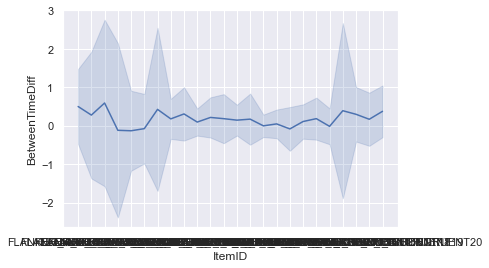

In [97]:

sns.lineplot(x="ItemID", y="BetweenTimeDiff", err_style="band", 
             ci='sd', estimator="mean", data=flanker)
plt.show()